<a href="https://colab.research.google.com/github/sanster9292/FASTAI_v3_Notebooks/blob/master/lesson3_BIWI_headpose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is the notebook recreation of the third and the final notebook in Lesson 3 of the 2019-2020 FastAI course. The actual Notebook is [here](https://nbviewer.jupyter.org/github/fastai/course-v3/blob/master/nbs/dl1/lesson3-head-pose.ipynb)**



In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [0]:
from fastai.vision import * 

**The dataset being used is called BIWI dataset which is headshots of people. It is to be used to find the center of the head**

In [4]:
path = untar_data(URLs.BIWI_HEAD_POSE)
path

PosixPath('/root/.fastai/data/biwi_head_pose')

**Loading and looking at an example from the dataset.**



In [5]:
"""
Load data files from a text file. Everything other than number of linesspecified
in skip_header or skip_footer are split at the delimiter characters
"""
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6); cal

array([[517.679,   0.   , 320.   ],
       [  0.   , 517.679, 240.5  ],
       [  0.   ,   0.   ,   1.   ]])

In [0]:
"""
The name of the image here is preset from the Notebook. Use this cell if you
want to continue with the preset image.

"""
# fname = '09/frame_00667_rgb.jpg'
fname = '09/frame_00382_rgb.jpg'
# os.listdir(path/'09')

In [0]:
def img2txt_name(f): return path/f'{str(f)[:-7]}pose.txt'


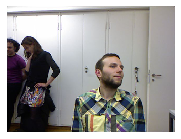

In [9]:
img = open_image(path/fname)
img.show()


In [10]:
ctr = np.genfromtxt(img2txt_name(fname),skip_header=3)

ctr


array([170.834  ,   9.63139, 915.189  ])

**Getting the center in the picture**


In [0]:
def convert_biwi(coords):
    c1 = coords[0] * cal[0][0]/coords[2] + cal[0][2]
    c2 = coords[1] * cal[1][1]/coords[2] + cal[1][2]
    return tensor([c2,c1])

def get_ctr(f):
  ctr = np.genfromtxt(img2txt_name(f),skip_header=3)
  return convert_biwi(ctr)

def get_ip(img,pts): return ImagePoints(FlowField(img.size, pts), scale=True)

In [12]:
get_ctr(fname)

tensor([245.9480, 416.6327])

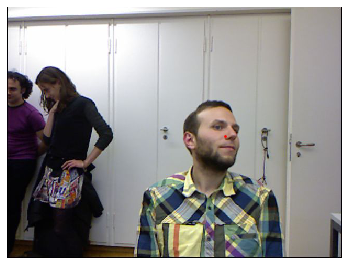

In [13]:
ctr = get_ctr(fname)
# img.show(y=get_ip(img,ctr),figsize=(6,6))
img.show(y=get_ip(img, ctr), figsize=(6, 6))

In [0]:
data = (PointsItemList.from_folder(path)
        .split_by_valid_func(lambda o: o.parent.name=='13')
        .label_from_func(get_ctr)
        .transform(get_transforms(), tfm_y=True, size=(120,160))
        .databunch().normalize(imagenet_stats)
       )

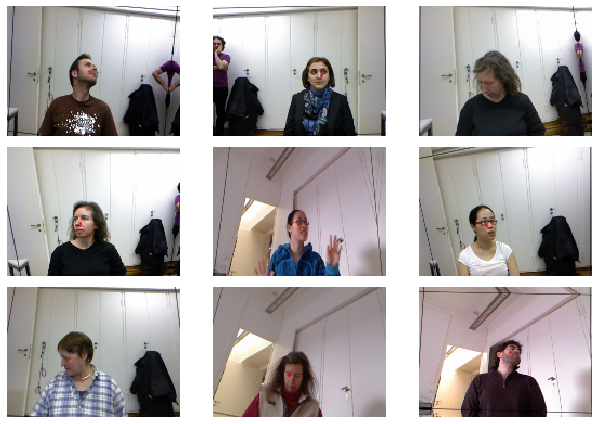

In [16]:
data.show_batch(3, figsize=(9,6))


**TRAIN MODEL**

In [17]:
learn = cnn_learner(data, models.resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


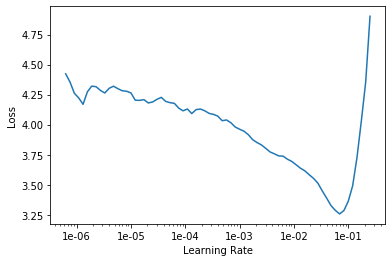

In [18]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 3e-2

In [21]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,time
0,0.144531,0.013901,03:15
1,0.027844,0.003164,03:19
2,0.010855,0.007157,03:21
3,0.006872,0.007440,03:27
4,0.005369,0.005493,03:23


In [0]:
learn.save('stage1')

In [23]:
learn.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList (15193 items)
x: PointsItemList
Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160)
y: PointsLabelList
ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160)
Path: /root/.fastai/data/biwi_head_pose;

Valid: LabelList (485 items)
x: PointsItemList
Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160),Image (3, 120, 160)
y: PointsLabelList
ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160),ImagePoints (120, 160)
Path: /root/.fastai/data/biwi_head_pose;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, cei

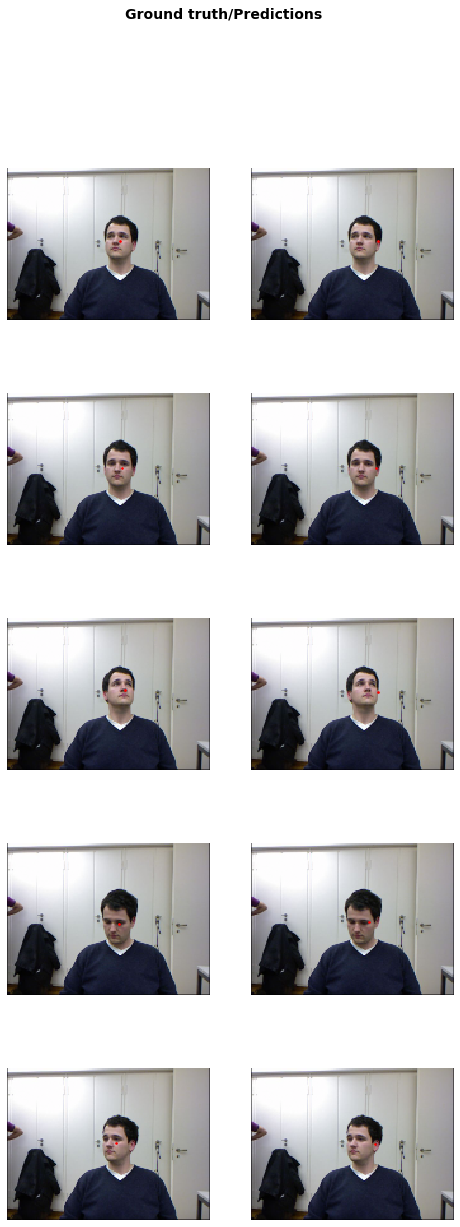

In [24]:
learn.show_results()